In [142]:
import numpy as np
import PySimpleGUI as sg
import random as random
import time

In [143]:
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [144]:
rgb_to_hex([255,255,255])

'#ffffff'

In [145]:
testDat = np.genfromtxt("test_rgb_array", delimiter = ',')

In [146]:
rgb_to_hex(testDat[0,:])

'#ffe8a5'

In [153]:
duration/(16*(np.shape(testDat)[0]))

3.90625

In [162]:
testDat = np.genfromtxt("test_rgb_array", delimiter = ',')
duration = 60

def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

def get_color_step(color1, color2, t):

    r = int(color1[0] + (color2[0] - color1[0]) * t)
    g = int(color1[1] + (color2[1] - color1[1]) * t)
    b = int(color1[2] + (color2[2] - color1[2]) * t)

    return (r, g, b)


#PORT_NAME = '/dev/ttyUSB0'  # Linux (might be /dev/ttyACM0, /dev/ttyUSB1, etc.)
# PORT_NAME = 'COM3'        # Windows (Change to the COM port your Arduino is connected to)

# Open the serial port
#ser = serial.Serial(PORT_NAME, 9600, timeout=1)
#ser.flush()

# Define the window layout
layout = [
    [sg.Text('', size=(50,50), key='-BACKGROUND-'),],
    [sg.Button('Test RGB demo sequence')],
    [sg.Exit()]]

# Create the window
window = sg.Window('SUNLAMP', layout)

while True:
    event, values = window.read()

    if event == sg.WINDOW_CLOSED or event == 'Exit':
        break
    if event == 'Test RGB demo sequence':
        
        steps = 75
        i=0

        while i < np.shape(testDat)[0]-1 and event != 'Exit':
            print(i)
            if i == 0:
                window['-BACKGROUND-'].update(background_color=rgb_to_hex(testDat[i,:]))  
                #window.read(timeout=100)# Change to desired color 
                #time.sleep(0.1)
                for k in random.sample(range(1, 17), 16):
                    #print(int(testDat[i, 0]), int(testDat[i, 1]), int(testDat[i, 1]), 255, k)
                    #time.sleep(duration/(16*(np.shape(testDat)[0])))
                    window.read(timeout = duration/(16*(np.shape(testDat)[0]))/100)
            
            start = testDat[i, :]
            end = testDat[i+1, :]

            for j in range(steps+1):
                t = j/steps
                interColor = get_color_step(start, end, t)
                
                window['-BACKGROUND-'].update(background_color=rgb_to_hex(interColor)) 
                window.read(timeout=100)# Change to desired color 
                time.sleep(0.1)
                for k in random.sample(range(1,17), 16):
                    #print(int(interColor[0]), int(interColor[1]), int(interColor[2]), 255, k)
                    #time.sleep(duration/(16*(np.shape(testDat)[0])))
                    window.read(timeout = duration/(16*(np.shape(testDat)[0]))/100)

            i += 1
            
        if i == np.shape(testDat)[0]-1:
            print("Done!")



window.close()
#ser.close()  # Close the serial connection

0


TclError: invalid command name ".!toplevel46.!frame.!label"

In [ ]:
steps = 100
i=0

while i < np.shape(testDat)[0]-1:
    print(i)
    if i == 0:
        window['-BACKGROUND-'].update(background_color=rgb_to_hex(testDat[i,:]))  
        window.read(timeout=100)# Change to desired color 
        #for k in random.sample(range(1, 17), 16):
            #print(int(testDat[i, 0]), int(testDat[i, 1]), int(testDat[i, 1]), 255, k)

    start = testDat[i, :]
    end = testDat[i+1, :]

    for j in range(steps+1):
        t = j/steps
        interColor = get_color_step(start, end, t)

        #window['-BACKGROUND-'].update(background_color=rgb_to_hex(interColor)) 

        #window.read(timeout=100)# Change to desired color 
        #for k in random.sample(range(1,17), 16):
            #print(int(interColor[0]), int(interColor[1]), int(interColor[2]), 255, k)
    i += 1


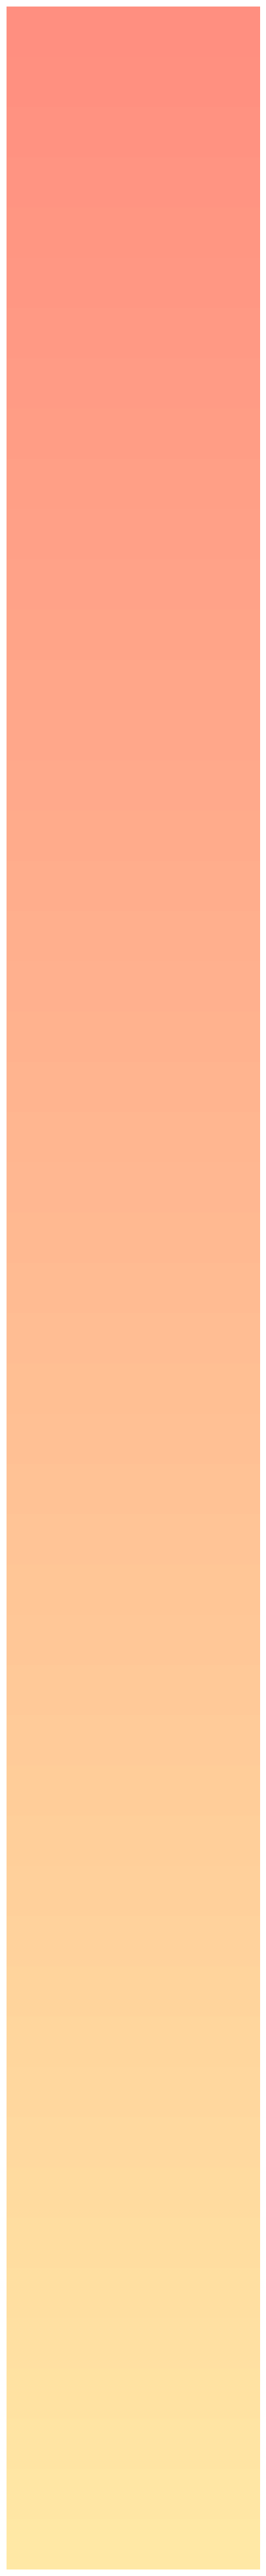

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def get_color_step(color1, color2, t):
    
    r = int(start_color[0] + (end_color[0] - start_color[0]) * t)
    g = int(start_color[1] + (end_color[1] - start_color[1]) * t)
    b = int(start_color[2] + (end_color[2] - start_color[2]) * t)

    return (r, g, b)


start = [255, 232, 165] 
end = [255, 143, 128]     

steps = 50  # How many steps you want in the transition
colors = []

for i in range(steps + 1):
    t = i / steps
    color = interpolate_color(start, end, t)
    colors.append(color)

fig, ax = plt.subplots(figsize=(5, len(colors)))

for i, color in enumerate(colors):
    rect = patches.Rectangle((0, i), 1, 1, linewidth=0, edgecolor='none', facecolor=(color[0]/255, color[1]/255, color[2]/255))
    ax.add_patch(rect)

ax.set_xlim(0, 1)
ax.set_ylim(0, len(colors))
ax.axis("off")

plt.show()